# <u>Submission instructions</u>
### Submission must be in pairs, unless otherwise authorized.
#### Submit by 28/2/2024

<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle file:
  <ul>
    <li>As requested in Q2.a</li>
  </ul>
</li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:
$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

### I. Softmax Derivative - Answer:
$$\frac{\partial softmax(x)_i}{\partial x_k} = \text{...}$$

To derive the gradients of the softmax function, we consider two cases:

### Case 1: When $i = k$ :

 Using the quotient rule, we have:

$$
\frac{\partial}{\partial x_k} softmax(x)_i = \frac{\partial}{\partial x_k} \left( \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \right)
$$

For $i = k$, this becomes:

$$
\frac{\partial}{\partial x_k} softmax(x)_k = \frac{e^{x_k} \sum_{j=1}^{N} e^{x_j} - e^{x_k} e^{x_k}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2}
$$

Simplifying, we get:

$$
\frac{\partial}{\partial x_k} softmax(x)_k = \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} \left(1 - \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}\right)
$$

Using the definition of the softmax function, this simplifies to:

$$
\frac{\partial}{\partial x_k} softmax(x)_k = softmax(x)_k (1 - softmax(x)_k)
$$

### Case 2: When $i\neq k$ :

Again, using the quotient rule:

$$
\frac{\partial}{\partial x_k} softmax(x)_i = \frac{0 - e^{x_i}e^{x_k}}{\left(\sum_{j=1}^{N} e^{x_j}\right)^2}
$$

Simplifying, we get:

$$
\frac{\partial}{\partial x_k} softmax(x)_i = - \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}}
$$

Using the definition of the softmax function, this simplifies to:

$$
\frac{\partial}{\partial x_k} softmax(x)_i = - softmax(x)_i softmax(x)_k
$$

### Summary

Combining both cases, the derivative of the softmax function with respect to $x_k$ can be expressed as:

$$
\frac{\partial}{\partial x_k} softmax(x)_i =
\begin{cases}
softmax(x)_k (1 - softmax(x)_k) & \text{if } i = k \\
- softmax(x)_i softmax(x)_k & \text{if } i \neq k
\end{cases}
$$


## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes.

### II. Cross-Entropy Gradient - Answer

<!--- write your answer -->
\begin{align*}
\frac{\partial CE(y, \hat{y})}{\partial\theta} &= -\frac{\partial}{\partial\theta}\sum_i y_i \log(\hat{y_i}) \\
&= -\sum_i y_i \frac{\partial \log(\hat{y_i})}{\partial \theta} \\
&= -\sum_i \frac{y_i}{\hat{y_i}} \frac{\partial\hat{y_i}}{\partial \theta}
\end{align*}
Using the result for the derivative of the softmax function:
$$
\frac{\partial}{\partial \theta_k} softmax(\theta)_i =
\begin{cases}
softmax(\theta)_i (1 - softmax(\theta)_i) & \text{if } i = k, \\
- softmax(\theta)_i softmax(\theta)_k & \text{if } i \neq k,
\end{cases}
$$
we can rewrite $\frac{\partial \hat{y_i}}{\partial \theta_k}$ as:
$$
\frac{\partial \hat{y_i}}{\partial \theta_k} = \hat{y_i}(\delta_{ik} - \hat{y_k}),
$$
where $\delta_{ik} = 1$ if $i = k$ and $0$ otherwise. Thus, substituting back into the gradient expression, we get:
$$
\frac{\partial CE(y, \hat{y})}{\partial \theta_k} = -\sum_i y_i \frac{1}{\hat{y_i}} \hat{y_i}(\delta_{ik} - \hat{y_k}) = -\sum_i y_i (\delta_{ik} - \hat{y_k}).
$$
Since $y$ is a one-hot vector, $y_i=0$ for all $y\neq k$ and $y_k=1$ for the true class $k$. Therefore, the expression simplifies to:
$$
\frac{\partial CE(y, \hat{y})}{\partial \theta_k} = -(y_k (1 - \hat{y_k}) + \sum_{i \neq k} 0 \cdot (\delta_{ik} - \hat{y_k})) = -y_k + \hat{y_k}.
$$
In vectorized form, this simplifies to:
$$
\frac{\partial CE(y, \hat{y})}{\partial\theta} = \hat{y} - y.
$$

# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [18]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [19]:
def d_sigmoid(x):
    return sigmoid(x)*(1 - sigmoid(x))


def d_tanh(x):
    return 1 - tanh(x)**2


def d_softmax(x):
    softmax_x = softmax(x)
    # Initialize the Jacobian matrix with zeros
    jacobian_m = torch.zeros((len(x), len(x)))

    # Fill in the Jacobian matrix for each pair of elements
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                # Diagonal elements: derivative of the element w.r.t. itself
                jacobian_m[i, j] = softmax_x[i] * (1 - softmax_x[i])
            else:
                # Off-diagonal elements: derivative of the element w.r.t. other elements
                jacobian_m[i, j] = -softmax_x[i] * softmax_x[j]
    return jacobian_m

## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the backward pass of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [21]:
import torch
import torchvision
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])


# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [22]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE,)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5988849.03it/s]


In [23]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        self.z1 = torch.matmul(x, self.W1) + self.b1
        h1 = self.activation_func(self.z1)
        self.z2 = torch.matmul(h1, self.W2) + self.b2
        y_hat = softmax(self.z2)
        return y_hat

    def backward(self, x, y, y_hat):
        # Derivative of cross-entropy loss with softmax
        # Note: we don't divide here by the batch size since we already divided by it in the loss function
        # Gradients for W2 and b2
        dL_dz2 = y_hat - one_hot(y)
        dz2_dW2 = self.activation_func(self.z1) # = h1
        dL_dW2 = torch.matmul(dz2_dW2.T, dL_dz2)
        dL_db2 = torch.sum(dL_dz2, axis=0)

        # Backpropagation through the hidden layer
        dz2_dh1 = self.W2
        dL_dh1 = torch.matmul(dL_dz2, dz2_dh1.T)
        dh1_dz1 = d_sigmoid(self.z1)
        dL_dz1 = dL_dh1 * dh1_dz1

        # Gradients for W1 and b1
        dL_dW1 = torch.matmul(x.T, dL_dz1)
        dL_db1 = torch.sum(dL_dz1, axis=0)
        # Update parameters
        self.W1 -= self.lr * dL_dW1
        self.b1 -= self.lr * dL_db1
        self.W2 -= self.lr * dL_dW2
        self.b2 -= self.lr * dL_db2

In [24]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [25]:
# Function to train the model for one epoch
def train_epoch(model, dataloader):
    total_loss = 0.0
    correct = 0
    total = 0
    for images, labels in dataloader:
        # Forward pass
        outputs = model.forward(images)
        loss = cross_entropy(labels, outputs)

        # Backward pass and update
        model.backward(images, labels, outputs)

        # Loss and accuracy calculation
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(dataloader.dataset)
    accuracy = correct / total
    return avg_loss, accuracy

In [26]:
# Function to evaluate the model
def evaluate(model, dataloader):
    total_loss = 0.0
    correct = 0
    total = 0
    for images, labels in dataloader:
        outputs = model.forward(images)
        loss = cross_entropy(labels, outputs)
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    avg_loss = total_loss / len(dataloader.dataset)
    accuracy = correct / total
    return avg_loss, accuracy

Epoch 1, Train Loss: 0.0218, Accuracy: 0.8227, Test Loss: 0.0120, Test Accuracy: 0.8854
Epoch 2, Train Loss: 0.0097, Accuracy: 0.9091, Test Loss: 0.0094, Test Accuracy: 0.9082
Epoch 3, Train Loss: 0.0077, Accuracy: 0.9280, Test Loss: 0.0083, Test Accuracy: 0.9201
Epoch 4, Train Loss: 0.0065, Accuracy: 0.9391, Test Loss: 0.0076, Test Accuracy: 0.9256
Epoch 5, Train Loss: 0.0058, Accuracy: 0.9459, Test Loss: 0.0071, Test Accuracy: 0.9307
Epoch 6, Train Loss: 0.0052, Accuracy: 0.9522, Test Loss: 0.0067, Test Accuracy: 0.9347
Epoch 7, Train Loss: 0.0047, Accuracy: 0.9567, Test Loss: 0.0064, Test Accuracy: 0.9378
Epoch 8, Train Loss: 0.0043, Accuracy: 0.9609, Test Loss: 0.0062, Test Accuracy: 0.9404
Epoch 9, Train Loss: 0.0040, Accuracy: 0.9638, Test Loss: 0.0060, Test Accuracy: 0.9420
Epoch 10, Train Loss: 0.0037, Accuracy: 0.9667, Test Loss: 0.0059, Test Accuracy: 0.9421
Epoch 11, Train Loss: 0.0034, Accuracy: 0.9691, Test Loss: 0.0058, Test Accuracy: 0.9438
Epoch 12, Train Loss: 0.0032, 

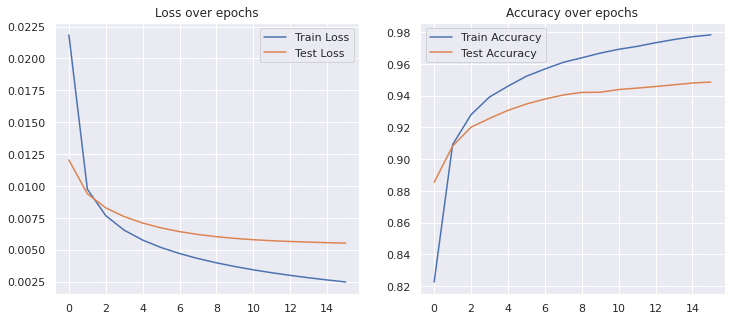

In [27]:
# Training the model
train_losses, train_accuracies = [], []
test_losses, test_accuracies = [], []
for epoch in range(EPOCHS):
    train_loss, train_accuracy = train_epoch(model, train_dataloader)
    test_loss, test_accuracy = evaluate(model, test_dataloader)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Plotting the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()

In [ ]:
students_ids = "931203129_315088724"
torch.save({"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2}, f"HW1_{students_ids}.pkl")

<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.

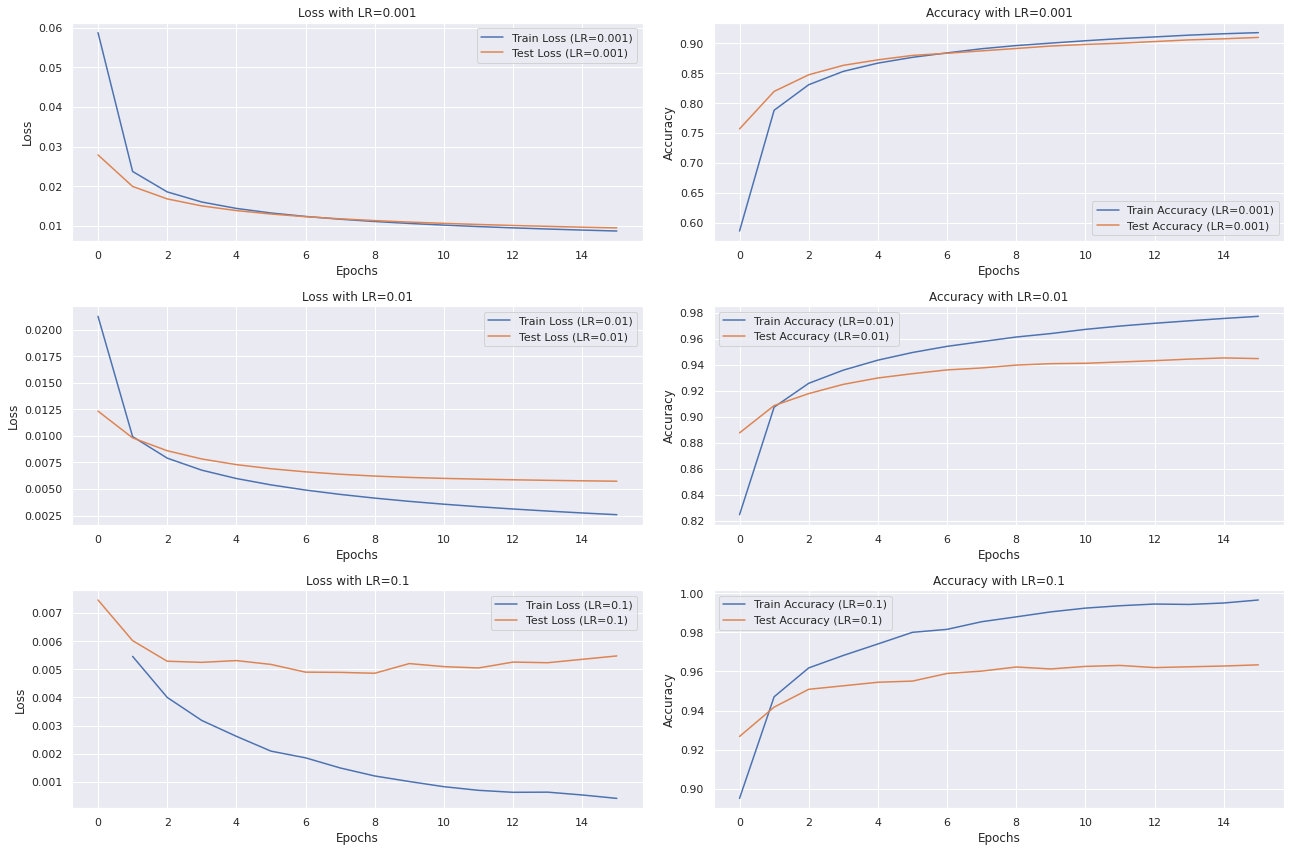

In [28]:
def train_and_evaluate_model(learning_rate):
    # Model initialization with the specified learning rate
    model = FullyConnectedNetwork(784, NUM_OF_CLASSES, 128, sigmoid, lr=learning_rate)

    # Lists to store loss and accuracy for plotting
    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []

    # Training loop
    for epoch in range(EPOCHS):
        train_loss, train_accuracy = train_epoch(model, train_dataloader)
        test_loss, test_accuracy = evaluate(model, test_dataloader)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

    return train_losses, train_accuracies, test_losses, test_accuracies

# Learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Dictionary to store results for different learning rates
results = {}

# Training models with different learning rates
for lr in learning_rates:
    results[lr] = train_and_evaluate_model(lr)

# Plotting the results
plt.figure(figsize=(18, 12))
for i, lr in enumerate(learning_rates):
    # Plotting training loss
    plt.subplot(3, 2, 2*i+1)
    plt.plot(results[lr][0], label=f'Train Loss (LR={lr})')
    plt.plot(results[lr][2], label=f'Test Loss (LR={lr})')
    plt.title(f'Loss with LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting training accuracy
    plt.subplot(3, 2, 2*i+2)
    plt.plot(results[lr][1], label=f'Train Accuracy (LR={lr})')
    plt.plot(results[lr][3], label=f'Test Accuracy (LR={lr})')
    plt.title(f'Accuracy with LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

plt.tight_layout()
plt.show()

As we can see in the graphs above, the most successful model in terms of prediction accuracy is the one with a learning rate of 0.1. The second best is the one with LR of 0.01, and the worst is the one with LR of 0.001. These results show that our model benefits from high learning rates.

# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> You are a data scientist at a supermarket. Your manager asked you to write a new image classifiaction algorithem for the self checkout cashiers. The images are of products from your grocery store (dataset files are attched in the Moodle).
<br>
Your code and meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
In order to satisfy your boss you have to reach 65% accuracy on the test set. You will get a bonus for your salary (and 10 points to your grade) if your model's number of paramters is less than 100K. You can reutilize code from the tutorials.

<ul style="font-size: 17px">
<li>Train the model and plot the model's accuracy and loss (both on train and validation sets) as a function of the epochs. </li>
<li>Report the test set accurecy.</li>
<li>Discus the progress you made and describe your final model.</li>

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
import pandas as pd
import os
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
#Avoid Kernel shutdown
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [ ]:
#Set parameters
num_epochs = 32
batch_size = 32
learning_rate = 0.001

In [ ]:
# Correct the name of the dataset class
class GroceryStoreDataset(Dataset):
    def __init__(self, file_path, transform=None):
        self.file_path = file_path
        self.transform = transform
        self.data = []

        # Load image paths and labels from the text file
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                image_path, label = line.strip().split(',')
                self.data.append((image_path, int(label)))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path, label = self.data[idx]
        image = Image.open('GroceryStoreDataset/' + image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, label

In [ ]:
import torch.nn.functional as F
"""
our transformations to the train dataset include resizing to fit the network's desired input size,
random rotations and flipping horizantially with certain probabilities (data augmentation),
normalizing (values are standard practice on images), and transforming to tensor object. 
"""
train_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=40),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

class MyCNNModel(nn.Module):
    def __init__(self):
        super(MyCNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.5) 
        # Assuming the input size is 256x256, after six max-pooling layers, the size is 4x4 
        self.fc1 = nn.Linear(256 * 4 * 4, 256)
        self.bn_fc1 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(256, 43)  #  43 classes

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.pool(F.relu(self.bn5(self.conv5(x))))
        x = self.pool(F.relu(self.bn6(self.conv6(x))))
        x = x.view(-1, 256 * 4 * 4)  
        x = self.dropout1(x)
        x = F.relu(self.bn_fc1(self.fc1(x)))
        x = self.dropout2(x)
        x = self.fc2(x)

        return F.log_softmax(x, dim=1)

train_file = 'GroceryStoreDataset/train.txt'
test_file = 'GroceryStoreDataset/test.txt'
val_file = 'GroceryStoreDataset/val.txt'

train_dataset = GroceryStoreDataset(file_path=train_file, transform=train_transform)
test_dataset = GroceryStoreDataset(file_path=test_file, transform=test_transform)
val_dataset = GroceryStoreDataset(file_path=val_file, transform=test_transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

In [57]:
#Building CNN model

cnn = MyCNNModel()

if torch.cuda.is_available():
    cnn = cnn.cuda()

# convert all the weights tensors to cuda()
# Loss and Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate, weight_decay=1e-5)

print('number of parameters of our model: ', sum(param.numel() for param in cnn.parameters()))

number of parameters of our model:  2044587


In [58]:
losses_train = []
losses_validation = []
epoch_list = list(range(0, num_epochs))
accuracy_train = []
accuracy_validation = []
# Training Loop
for epoch in range(num_epochs):
    cnn.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    for (images, labels) in (train_loader):
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()

        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = cnn(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        running_loss += loss.item()



    epoch_loss = running_loss / len(train_loader)
    losses_train.append(epoch_loss)
    train_epoch_accuracy = 100 * correct / total
    accuracy_train.append(train_epoch_accuracy)
    print(f"Epoch {epoch+1}, Train Loss: {epoch_loss:.4f}, Train Accuracy: {train_epoch_accuracy}%")

    # Validation steps
    cnn.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():  # No gradients needed for validation
        for images, labels in test_loader:
            if torch.cuda.is_available():
                images, labels = images.cuda(), labels.cuda()

            outputs = cnn(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()


    val_epoch_loss = val_loss / len(val_loader)
    losses_validation.append(val_epoch_loss)
    val_epoch_accuracy = 100 * correct / total
    accuracy_validation.append(val_epoch_accuracy)
    print(f"Epoch {epoch+1}, Test Loss: {val_epoch_loss:.4f}, Test Accuracy: {val_epoch_accuracy:.2f}%")
    if val_epoch_accuracy > 65:
        break

Epoch 1, Train Loss: 2.7775, Train Accuracy: 25.075757575757574%
Epoch 1, Test Loss: 19.2236, Test Accuracy: 30.02%
Epoch 2, Train Loss: 2.0214, Train Accuracy: 40.75757575757576%
Epoch 2, Test Loss: 18.4536, Test Accuracy: 32.03%
Epoch 3, Train Loss: 1.6958, Train Accuracy: 48.14393939393939%
Epoch 3, Test Loss: 12.9571, Test Accuracy: 49.46%
Epoch 4, Train Loss: 1.3749, Train Accuracy: 58.10606060606061%
Epoch 4, Test Loss: 13.0537, Test Accuracy: 46.72%
Epoch 5, Train Loss: 1.1622, Train Accuracy: 63.21969696969697%
Epoch 5, Test Loss: 12.6069, Test Accuracy: 50.10%
Epoch 6, Train Loss: 1.0767, Train Accuracy: 66.36363636363636%
Epoch 6, Test Loss: 9.8662, Test Accuracy: 58.91%
Epoch 7, Train Loss: 0.9801, Train Accuracy: 69.84848484848484%
Epoch 7, Test Loss: 10.7991, Test Accuracy: 57.42%
Epoch 8, Train Loss: 0.8721, Train Accuracy: 72.53787878787878%
Epoch 8, Test Loss: 9.3397, Test Accuracy: 61.85%
Epoch 9, Train Loss: 0.7608, Train Accuracy: 75.83333333333333%
Epoch 9, Test Los

In [59]:
# Test Loop on the final model

cnn.eval()  # Set the model to evaluation mode
correct = 0
total = 0
running_loss = 0.0
with torch.no_grad():  # No gradients needed
    for images, labels in test_loader:
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()

        outputs = cnn(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss = running_loss / len(test_loader)

test_accuracy = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%")

Test Loss: 1.1366, Accuracy: 67.08%


<Figure size 1200x500 with 0 Axes>

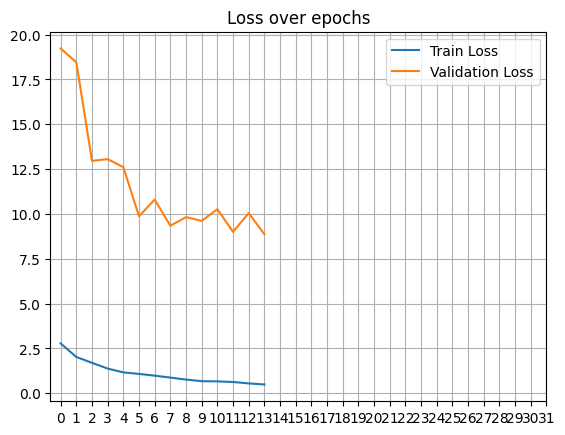

<Figure size 640x480 with 1 Axes>

<Figure size 1200x500 with 0 Axes>

In [60]:
plt.plot(losses_train, label='Train Loss')
plt.plot(losses_validation, label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.grid(True)
plt.xticks(epoch_list)
plt.figure(figsize=(12, 5))

14

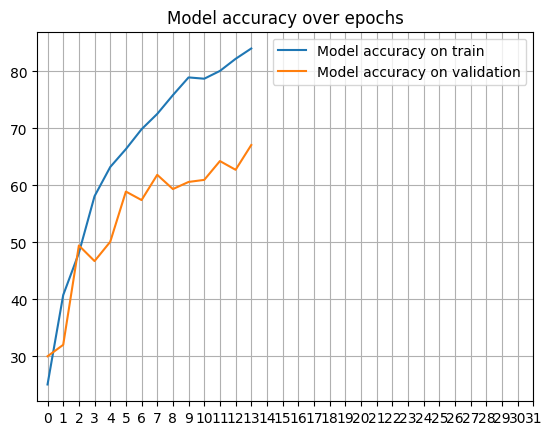

<Figure size 640x480 with 1 Axes>

In [61]:
plt.plot(accuracy_train , label='Model accuracy on train')
plt.plot(accuracy_validation , label='Model accuracy on validation')
plt.title('Model accuracy over epochs')
plt.grid(True)
plt.xticks(epoch_list)
plt.legend()
len(accuracy_train)

**Discussion**

Our CNN model consists of 6 layers, each of them has 4 steps: convolution, batch normalization, ReLu activation function and max pooling. Inspired by VGG16, the filers are getting increasingly larger in each layer. 2 fully connected neural networks are then followed, which has a dropout probability of 0.5. The final prediction probabilities are given by the logsoftmax function, and our loss function is cross entropy.

We can see in the graphs that as the epochs increased during training, the loss and accuracy of the model on the train and test data steadily improved. There is evidently some overfitting since the accuracy on the test is significantly lower than the train.

We'd like to note that we decided to use the test dataset as some sort of "validation" (we are aware its not good a practice), because we felt like the validation set was too small and not representative, and we wanted to stop training our model reaching our goal which is 65% accuracy on the test dataset.

## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the 'birds' folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the 'dogs' folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot the filters, and then plot their response (their output) for the image from question 5. Explain your observations.

In [1]:
# part 1
import torch
import torchvision.models as models
import torchvision.transforms as transforms

# Load pre-trained VGG16 model
model = models.vgg16(pretrained=True, progress=True)
model.eval()  # Set the model to evaluation mode
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

/opt/python/envs/default/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/python/envs/default/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/datalore/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:04<00:00, 119MB/s] 


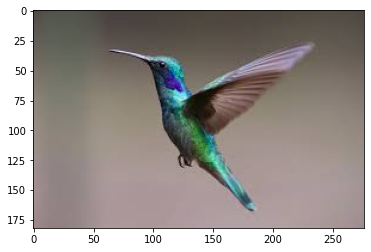

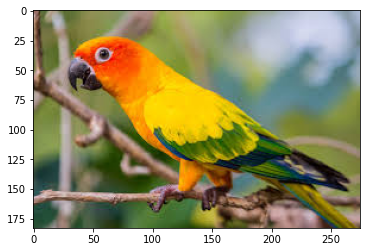

In [10]:
# part 2
from PIL import Image
import matplotlib.pyplot as plt

def load_and_display_images(image_paths):
    images = []
    for path in image_paths:
        image = Image.open(path).convert("RGB")
        plt.imshow(image)
        plt.show()
        images.append(image)
    return images

image_paths = ["/data/notebook_files/birds/bird_0.jpg", "/data/notebook_files/birds/bird_1.jpg"]  # Update with actual paths
images = load_and_display_images(image_paths)

In [11]:
import json

file_path = 'imagenet_class_index.json'

with open(file_path, 'r') as f:
    class_idx = json.load(f)

idx2label = {int(key): value for key, value in class_idx.items()}

In [12]:
#3 - preprocessing: we resize the picture to a 224x224 square,
# transorm it to a tensor object, and normalize it using the given values.

import torch.nn.functional as F

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])
images_preprocessed = [preprocess(image) for image in images]

#4 feed images to network and show output
with torch.no_grad():  # No need to calculate gradients
    for image_path, image in zip(image_paths, images_preprocessed):
        image_name = image_path.split('/')[-1]
        image = image.unsqueeze(0)  # Add batch dimension
        output = model(image)

        # Apply softmax to get probabilities
        probabilities = F.softmax(output, dim=1)

        # Get the top 5 predictions
        top5_prob, top5_catid = torch.topk(probabilities, 5)

        print(f"Probabilities for image: {image_name}")
        for i in range(top5_prob.size(1)):
            print(f"{idx2label[top5_catid[0][i].item()][1]}: {top5_prob[0][i].item()*100:.2f}%")
            print(f"Predicted label is: {idx2label[top5_catid[0][0].item()][1]}")
        print("\n---\n")

Probabilities for image: bird_0.jpg
hummingbird: 86.44%
Predicted label is: hummingbird
jacamar: 13.55%
Predicted label is: hummingbird
bee_eater: 0.02%
Predicted label is: hummingbird
black_stork: 0.00%
Predicted label is: hummingbird
water_ouzel: 0.00%
Predicted label is: hummingbird

---

Probabilities for image: bird_1.jpg
lorikeet: 94.15%
Predicted label is: lorikeet
macaw: 4.01%
Predicted label is: lorikeet
toucan: 1.08%
Predicted label is: lorikeet
bee_eater: 0.29%
Predicted label is: lorikeet
goldfinch: 0.17%
Predicted label is: lorikeet

---



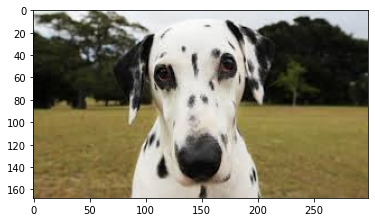

In [13]:
#5
image_path_dog = ["/data/notebook_files/dogs/dog_4.jpg"]
image_dog = load_and_display_images(image_path_dog)

In [14]:
# Resize the image to be of a size 224x224
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

images_preprocessed = [preprocess(image) for image in image_dog]


with torch.no_grad():  # No need to calculate gradients
    for image_path, image in zip(image_path_dog, images_preprocessed):
        image_name = image_path.split('/')[-1]  # Extract the file name from the path
        image = image.unsqueeze(0)  # Add batch dimension
        output = model(image)

        # Apply softmax to get probabilities
        probabilities = F.softmax(output, dim=1)

        # Get the top 5 predictions
        top5_prob, top5_catid = torch.topk(probabilities, 5)

        print(f"Probabilities for image: {image_name}")
        for i in range(top5_prob.size(1)):
            print(f"{idx2label[top5_catid[0][i].item()][1]}: {top5_prob[0][i].item()*100:.2f}%")
            print(f"Predicted label is: {idx2label[top5_catid[0][0].item()][1]}")
        print("\n---\n")

Probabilities for image: dog_4.jpg
dalmatian: 93.68%
Predicted label is: dalmatian
Great_Dane: 5.65%
Predicted label is: dalmatian
English_setter: 0.48%
Predicted label is: dalmatian
Border_collie: 0.04%
Predicted label is: dalmatian
muzzle: 0.03%
Predicted label is: dalmatian

---



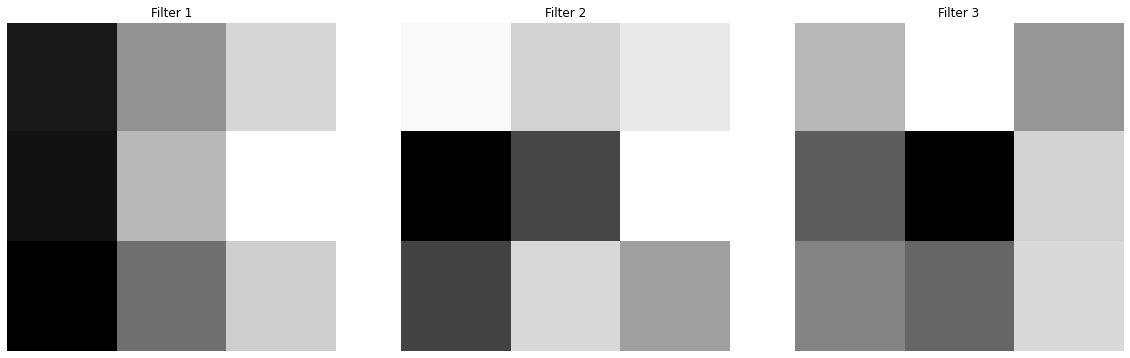

In [15]:
# Access the first layer
first_layer = model.features[0]
# Visualize filters
filters = first_layer.weight.data.clone()
plt.figure(figsize=(20, 17))
for i, filter in enumerate(filters[:3]):
    plt.subplot(1, 3, i+1)
    plt.imshow(filter[0, :, :].numpy(), cmap='gray')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
plt.show()

In [16]:
#6 - visualize the response of the first three filters

import torch
import torchvision.models as models

# Load the pre-trained VGG16 model
model = models.vgg16(pretrained=True).eval()

# Define a hook
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Attach the hook to the first convolutional layer
model.features[0].register_forward_hook(get_activation('conv1'))

from PIL import Image
import torchvision.transforms as transforms

# Image transformation
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess the image
image_path = "/data/notebook_files/dogs/dog_4.jpg"
image = Image.open(image_path).convert('RGB')
image = preprocess(image).unsqueeze(0)  # Add batch dimension

# Forward pass
model(image)

# Get the activation of the first layer
first_layer_activation = activation['conv1']

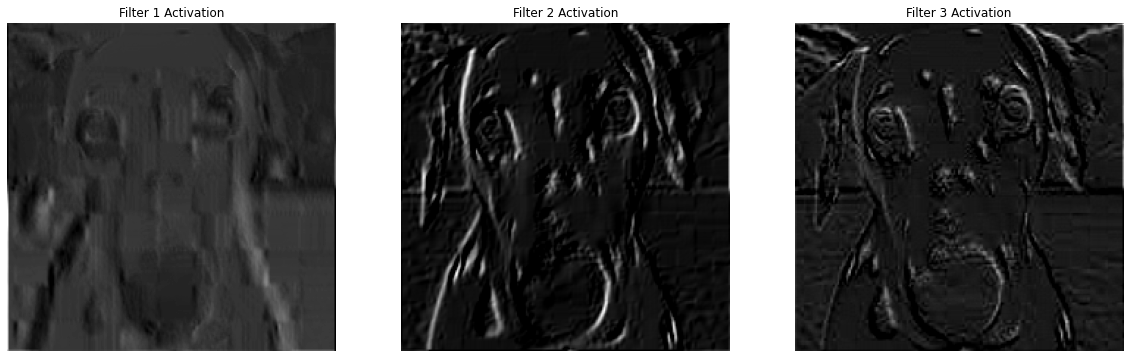

In [17]:
import matplotlib.pyplot as plt

# Visualize the activation maps for the first three filters
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i in range(3):
    ax = axes[i]
    ax.imshow(first_layer_activation[0, i].cpu().numpy(), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i+1} Activation')
plt.show()

**Observations**

The activation maps visualize how each of the first three filters responds to the input image. We can see that the outline of the dog's features such as the face, body, eyes are clear from these maps. These high activation zones indicate parts of the image where the filter's pattern is detected strongly. This can give insights into what features the CNN is focusing on in the early layers for making predictions.